In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install scikit-plot
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import os
import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
!pip install -U -q PyDrive                        #pydrive installation
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()                           #authentication
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fileDownloaded = drive.CreateFile({'id':'12lsfvOOBCVsYsi56ftdA2ey0KpaOZK_R'})  #drive file id dataset:fer2013
fileDownloaded.GetContentFile('fer2013.csv')
data=pd.read_csv('fer2013.csv')
data.shape
data.isnull().sum()
data.head(20) #showing first 20 datasets

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
CLASS_LABELS  = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', "Surprised"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] ,
             color = np.unique(data['emotion']) ,
             color_continuous_scale="icefire")
fig.update_xaxes(title="Emotions/Expressions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':1,
        'x':1,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
data = data.sample(frac=1)
labels = to_categorical(data[['emotion']], num_classes=7)
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
pixels = train_pixels.reshape((35887*2304,1))
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)
pixels = train_pixels.reshape((35887, 48, 48,1))
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
print(f"Train shape:{X_train.shape}, Test shape:{X_test.shape}, Validation shape:{X_val.shape} ")



Train shape:(29068, 48, 48, 1), Test shape:(3589, 48, 48, 1), Validation shape:(3230, 48, 48, 1) 


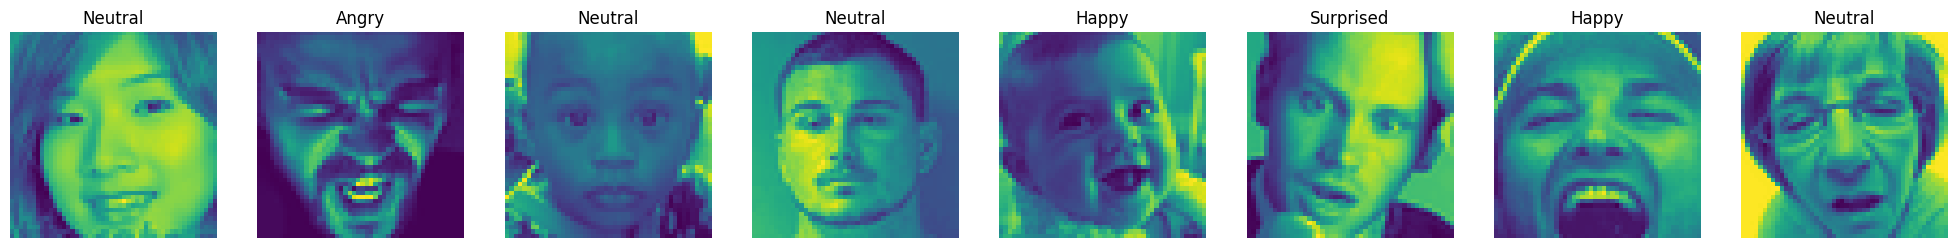

In [ ]:
plt.figure(figsize=(25,15))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Sad', 5 : 'Surprised', 6 : 'Neutral'}
i = 1
for i in range (8):
    img = np.squeeze(X_train[i])
    plt.subplot(1,8,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
datagen = ImageDataGenerator(  width_shift_range = 0.12,
                               height_shift_range = 0.12,
                               horizontal_flip = True,
                               zoom_range = 0.23)
valgen = ImageDataGenerator(   width_shift_range = 0.12,
                               height_shift_range = 0.12,
                               horizontal_flip = True,
                               zoom_range = 0.23)

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)
train_generator = datagen.flow(X_train, y_train, batch_size=32)   #batch size is set to 32
val_generator = datagen.flow(X_val, y_val, batch_size=32)

In [ ]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model


In [ ]:
 model = cnn_model()

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 15),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [ ]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/500
908/909 [============================>.] - ETA: 0s - loss: 13.6653 - accuracy: 0.1933
Epoch 1: val_accuracy improved from -inf to 0.24520, saving model to best_model.h5
909/909 [==============================] - 46s 34ms/step - loss: 13.6640 - accuracy: 0.1934 - val_loss: 12.1053 - val_accuracy: 0.2452
Epoch 2/500
909/909 [==============================] - ETA: 0s - loss: 10.8127 - accuracy: 0.2256
Epoch 2: val_accuracy improved from 0.24520 to 0.25604, saving model to best_model.h5
909/909 [==============================] - 30s 33ms/step - loss: 10.8127 - accuracy: 0.2256 - val_loss: 9.1519 - val_accuracy: 0.2560
Epoch 3/500
909/909 [==============================] - ETA: 0s - loss: 7.8983 - accuracy: 0.2433
Epoch 3: val_accuracy improved from 0.25604 to 0.30402, saving model to best_model.h5
909/909 [==============================] - 32s 35ms/step - loss: 7.8983 - accuracy: 0.2433 - val_loss: 6.4418 - val_accuracy: 0.3040
Epoch 4/500
909/909 [=============================

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 9ms/step - loss: 1.2491 - accuracy: 0.6687
Test Acc: 0.668709933757782


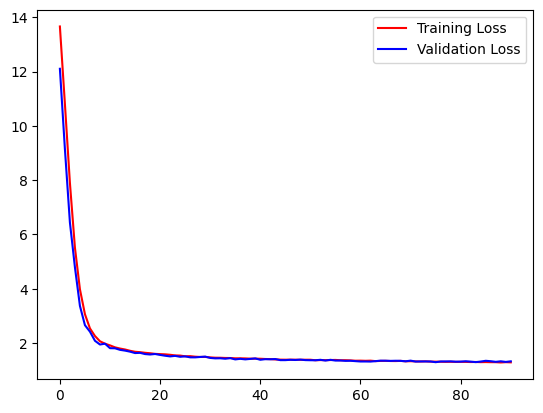

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

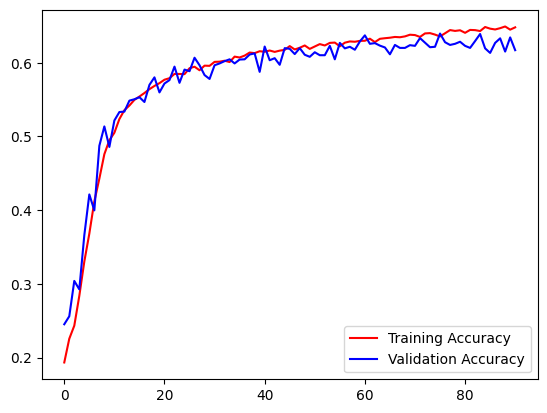

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()


In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 7ms/step - loss: 1.2491 - accuracy: 0.6687
Test Acc: 0.668709933757782
113/113 [==============================] - 1s 6ms/step


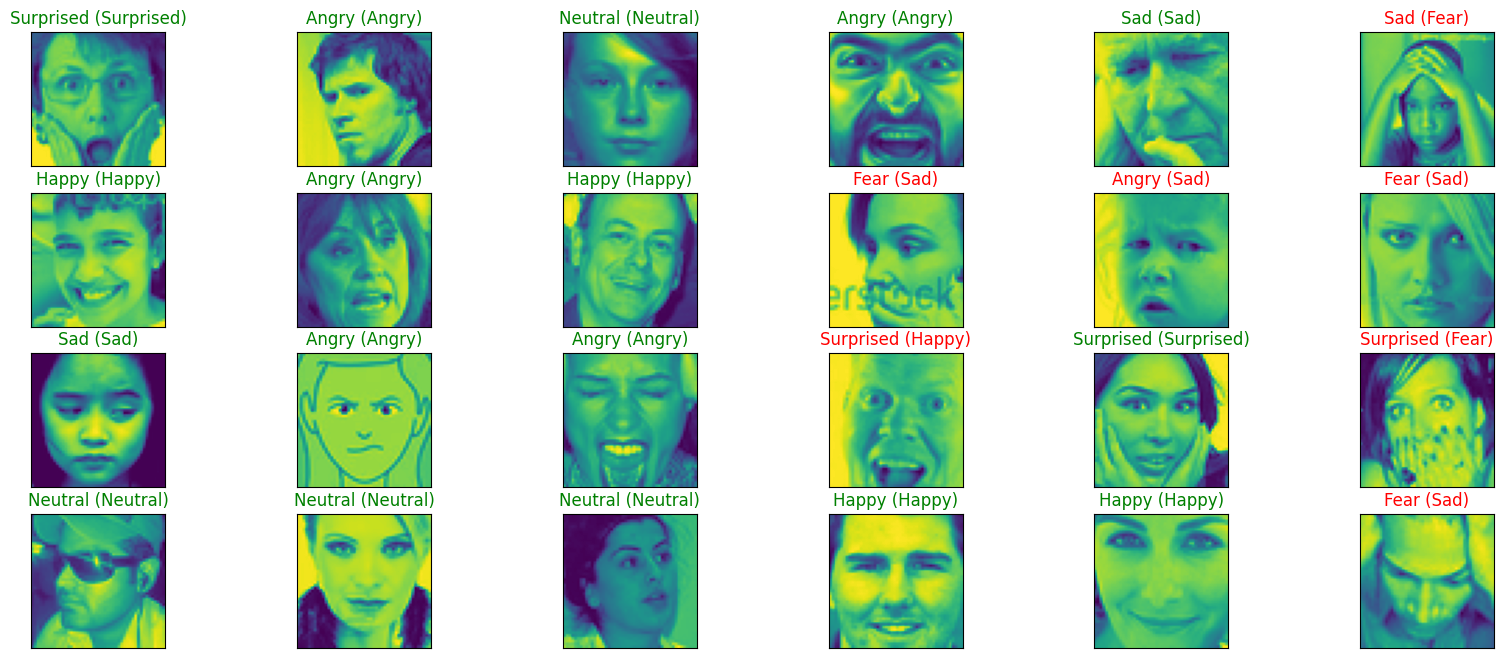

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Sad', 5 : 'Surprised', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

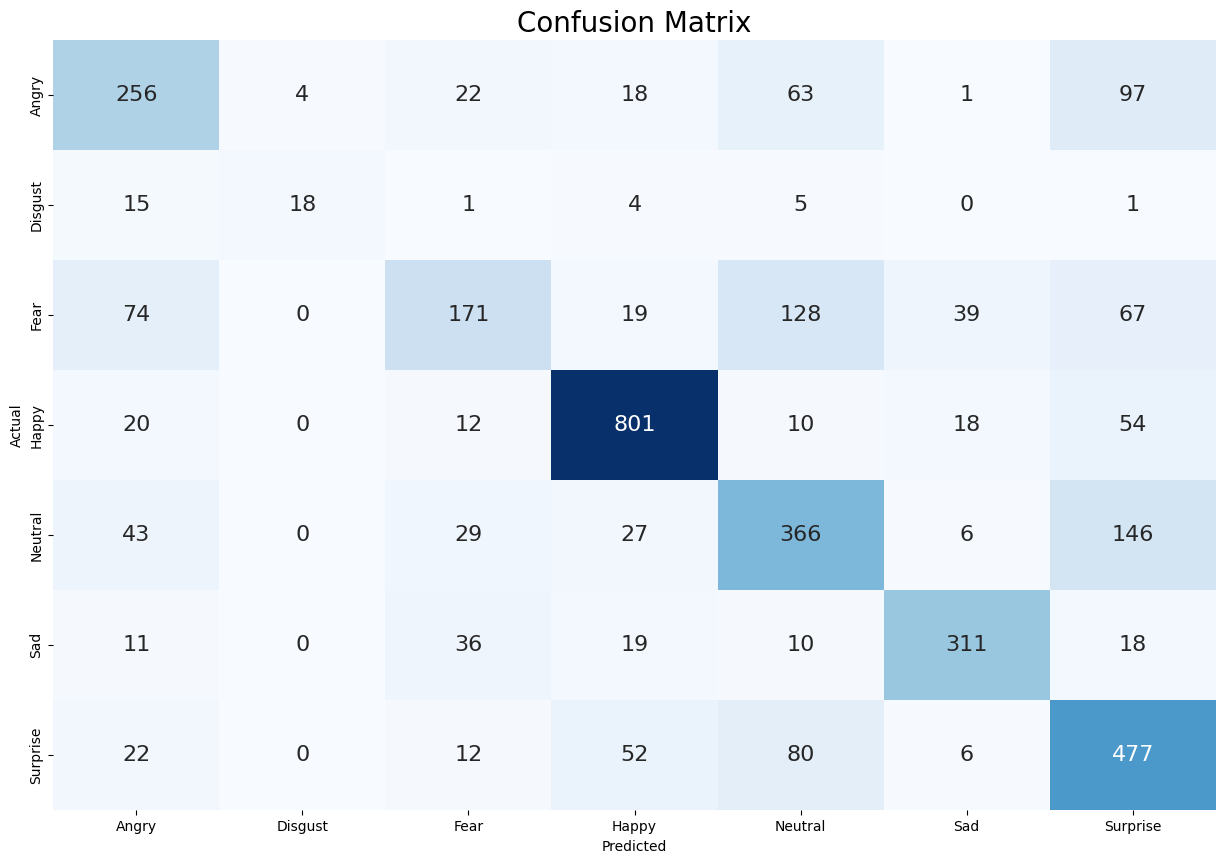

In [ ]:
CLASS_LABELS  = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.580     0.555     0.568       461
           1      0.818     0.409     0.545        44
           2      0.604     0.343     0.438       498
           3      0.852     0.875     0.864       915
           4      0.553     0.593     0.572       617
           5      0.816     0.768     0.791       405
           6      0.555     0.735     0.632       649

    accuracy                          0.669      3589
   macro avg      0.683     0.611     0.630      3589
weighted avg      0.673     0.669     0.663      3589



In [ ]:
def cnn_model1():

  model1= tf.keras.models.Sequential()
  model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model1.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model1.add(BatchNormalization())
  model1.add(MaxPool2D(pool_size=(2, 2)))
  model1.add(Dropout(0.2))

  model1.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model1.add(BatchNormalization())
  model1.add(MaxPool2D(pool_size=(2, 2)))
  model1.add(Dropout(0.2))

  model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model1.add(BatchNormalization())
  model1.add(MaxPool2D(pool_size=(2, 2)))
  model1.add(Dropout(0.2))

  model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model1.add(BatchNormalization())
  model1.add(MaxPool2D(pool_size=(2, 2)))
  model1.add(Dropout(0.2))

  model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model1.add(BatchNormalization())
  model1.add(MaxPool2D(pool_size=(2, 2)))
  model1.add(Dropout(0.2))

  model1.add(Flatten())
  model1.add(Dense(256,activation = 'relu'))
  model1.add(BatchNormalization())
  model1.add(Dropout(0.2))

  model1.add(Dense(512,activation = 'relu'))
  model1.add(BatchNormalization())
  model1.add(Dropout(0.2))

  model1.add(Dense(7, activation='softmax'))
  model1.compile(
    optimizer = SGD(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model1


In [ ]:
 model1 = cnn_model1()
model1.compile(
    optimizer = SGD(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 12),
                              ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                              save_best_only=True,mode="max")]

history = model1.fit(train_generator,
                    epochs=500,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

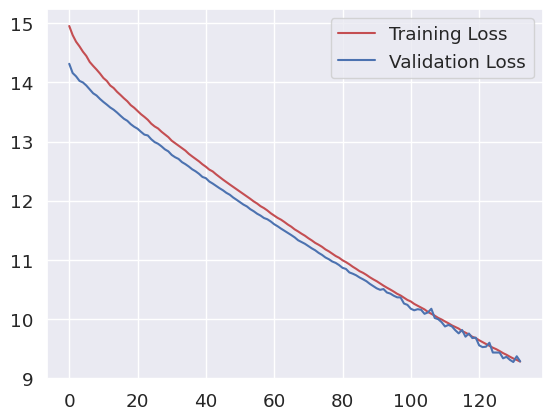

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

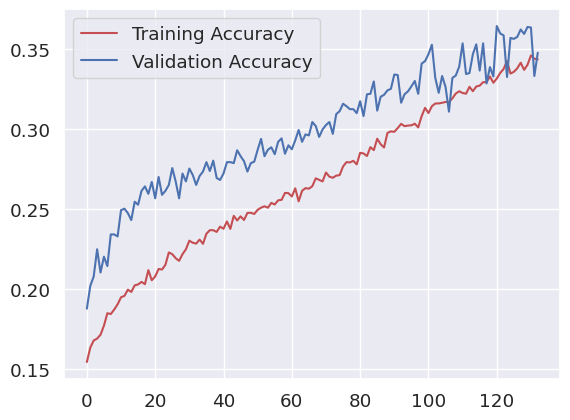

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
loss1 = model1.evaluate(X_test,y_test)
print("Test Acc: " + str(loss1[1]))
preds = model1.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 1s 7ms/step - loss: 9.4858 - accuracy: 0.3987
Test Acc: 0.39871829748153687
113/113 [==============================] - 1s 6ms/step


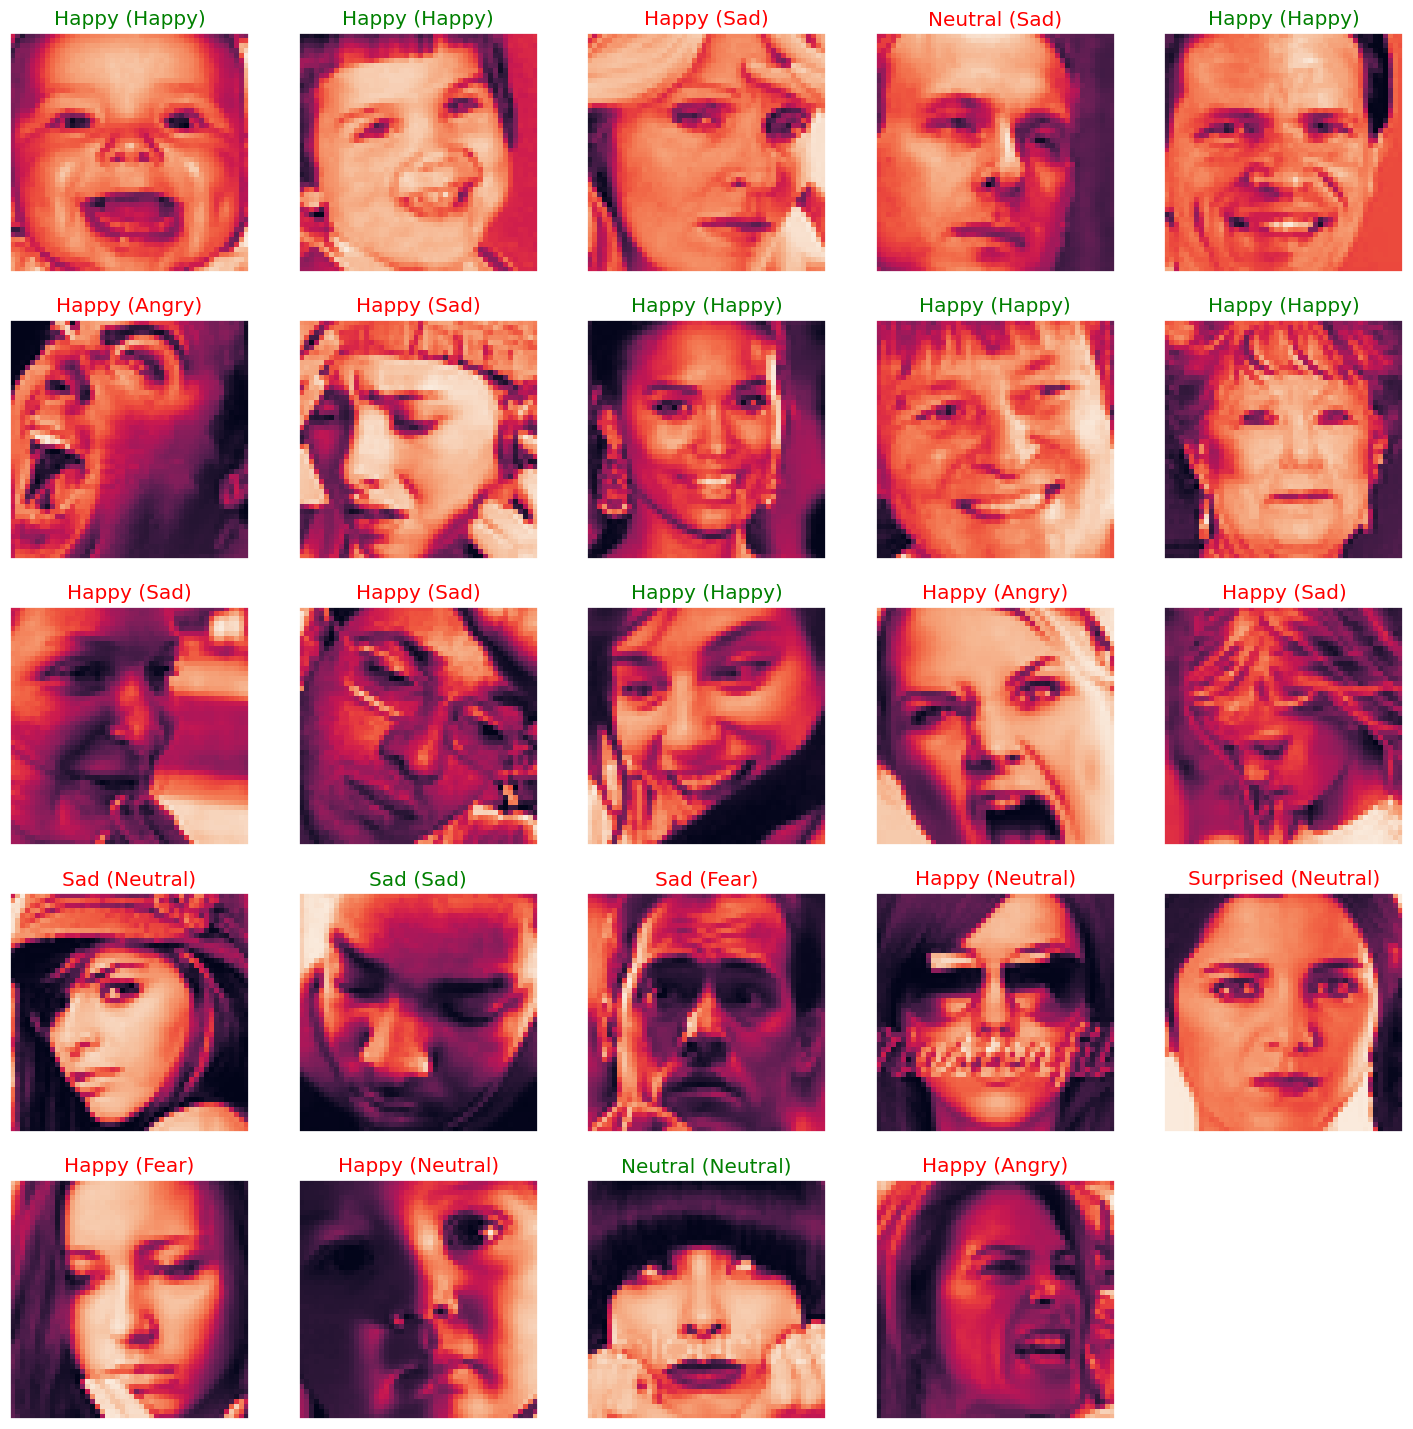

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Sad', 5 : 'Surprised', 6 : 'Neutral'}

figure = plt.figure(figsize=(18, 18))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

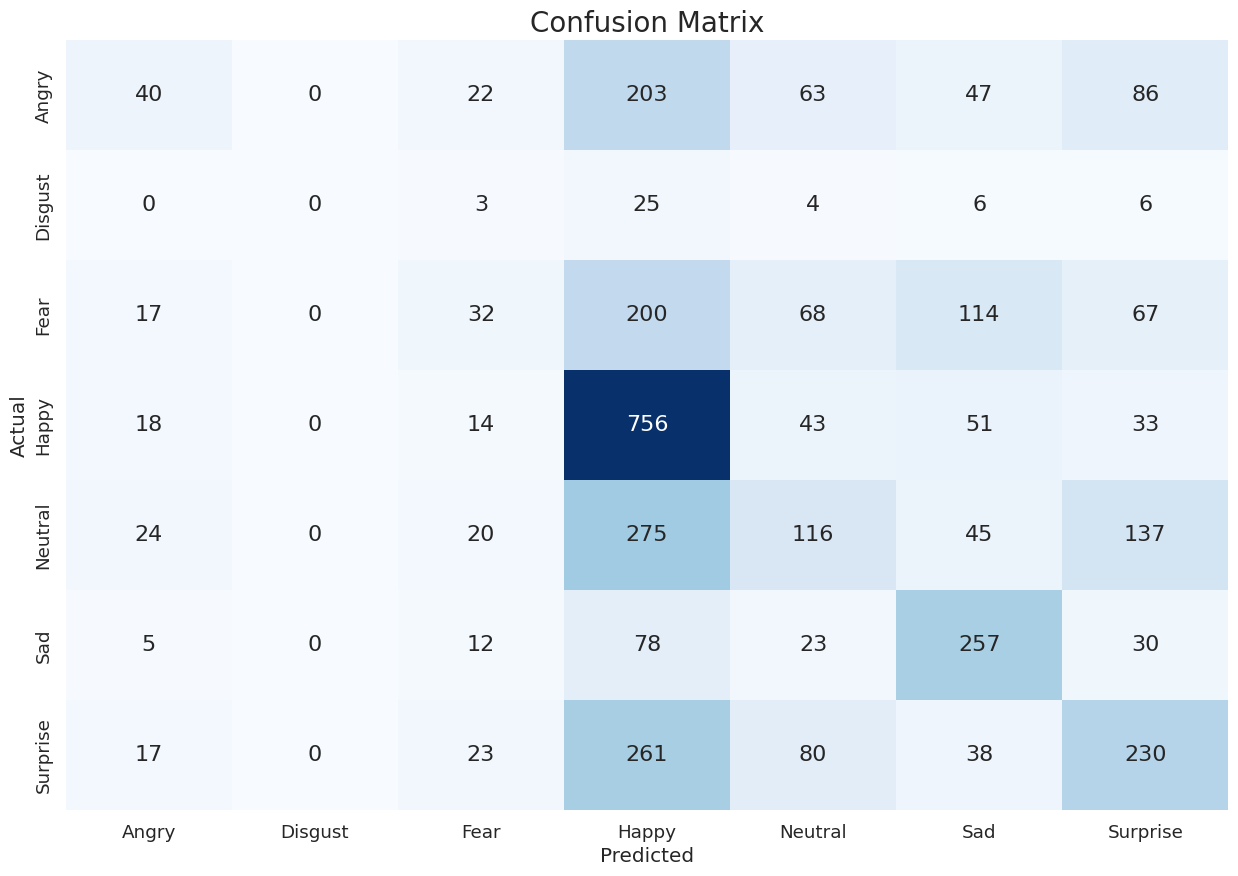

In [ ]:
CLASS_LABELS  = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.331     0.087     0.137       461
           1      0.000     0.000     0.000        44
           2      0.254     0.064     0.103       498
           3      0.420     0.826     0.557       915
           4      0.292     0.188     0.229       617
           5      0.461     0.635     0.534       405
           6      0.390     0.354     0.372       649

    accuracy                          0.399      3589
   macro avg      0.307     0.308     0.276      3589
weighted avg      0.358     0.399     0.341      3589



In [ ]:
 model = cnn_model()
model.compile(loss=keras.losses.categorical_crossentropy,
		optimizer=keras.optimizers.Adadelta(0.0001), metrics=['accuracy'])
model.summary()
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 12),
                              ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                              save_best_only=True,mode="max")]

history = model.fit(train_generator,
                    epochs=500,
                    batch_size=64,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)      

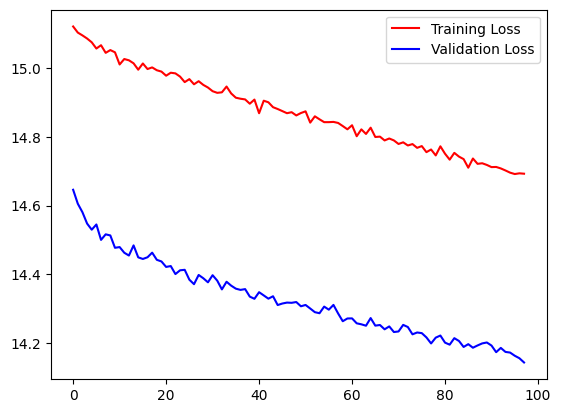

In [ ]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

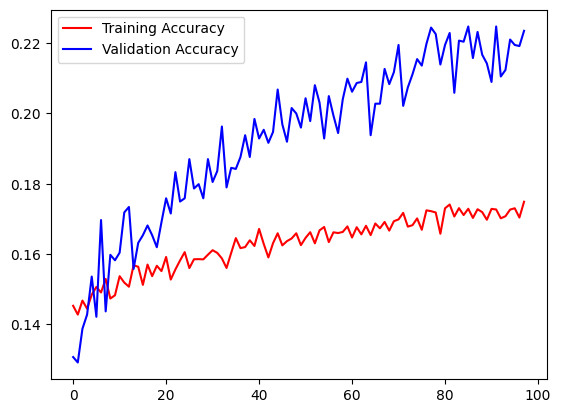

In [ ]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [ ]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 2s 12ms/step - loss: 14.2522 - accuracy: 0.2132
Test Acc: 0.21315129101276398
113/113 [==============================] - 1s 7ms/step


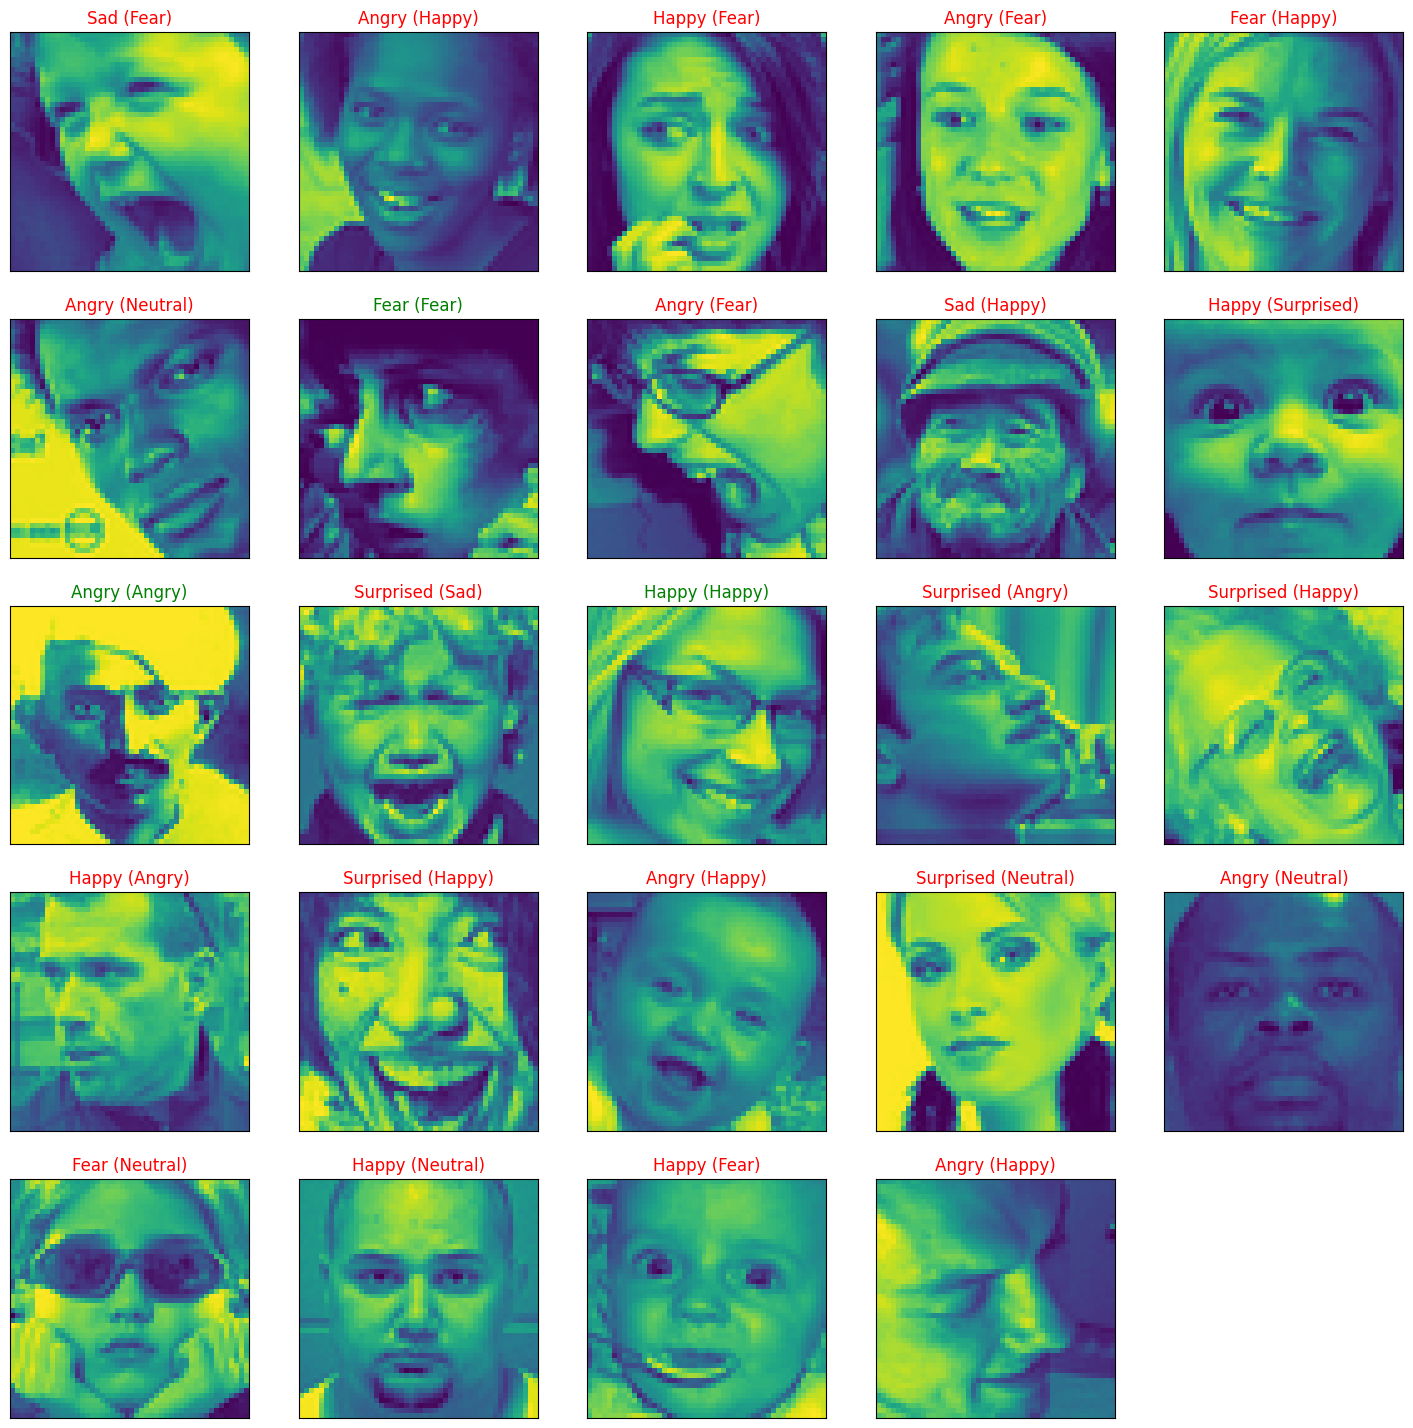

In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happy', 4 : 'Sad', 5 : 'Surprised', 6 : 'Neutral'}

figure = plt.figure(figsize=(18, 18))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

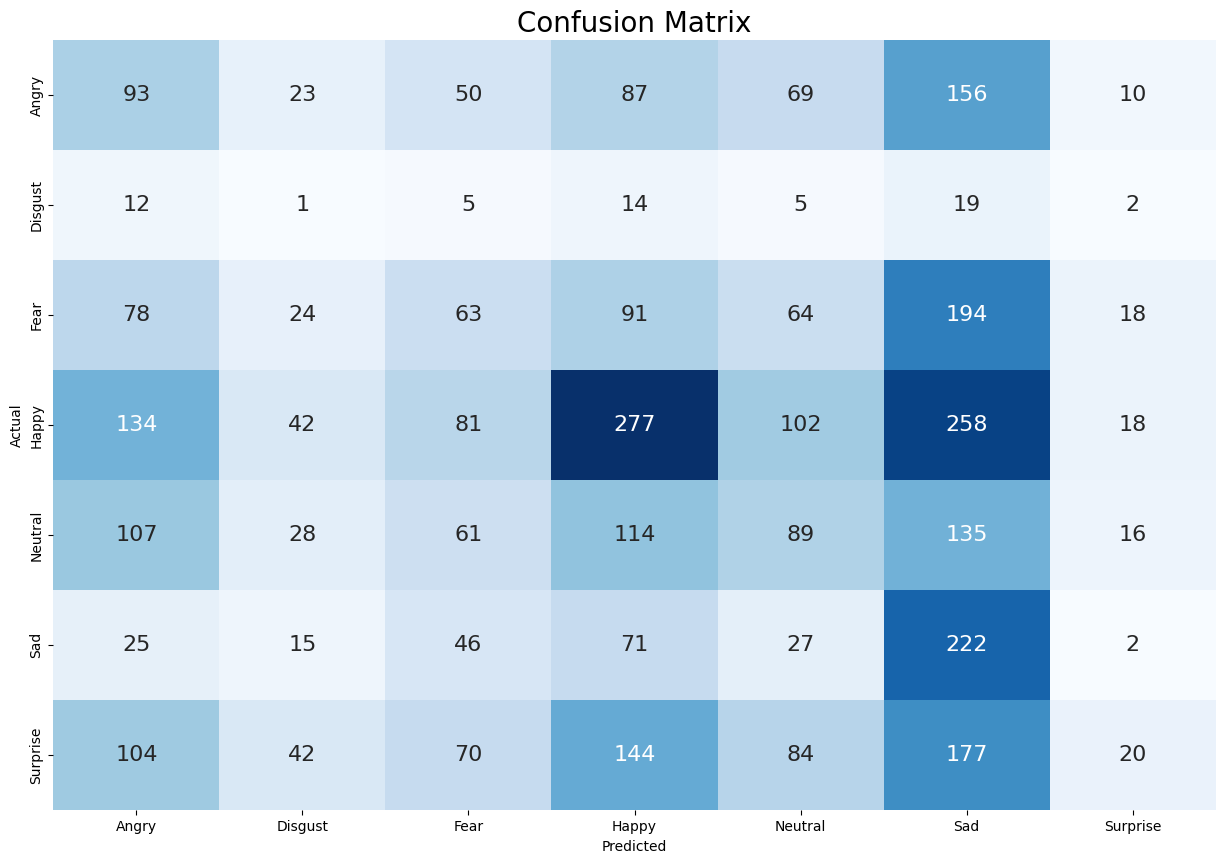

In [ ]:
CLASS_LABELS  = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.168     0.191     0.179       488
           1      0.006     0.017     0.009        58
           2      0.168     0.118     0.139       532
           3      0.347     0.304     0.324       912
           4      0.202     0.162     0.180       550
           5      0.191     0.544     0.283       408
           6      0.233     0.031     0.055       641

    accuracy                          0.213      3589
   macro avg      0.188     0.195     0.167      3589
weighted avg      0.230     0.213     0.197      3589

